In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df["Exited"]

In [117]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

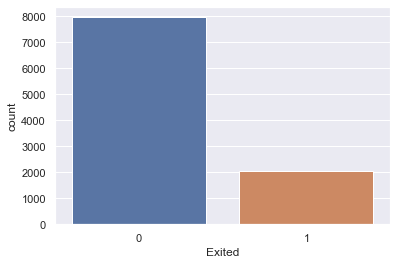

In [118]:
sns.countplot(x=y);

In [119]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
x_scaler=ss.fit_transform(x) 

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=0)

In [121]:

#Let us create the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Initialize ANN
classifier = Sequential()
#Add input layer and hidden layer
classifier.add(Dense(6, activation = 'relu', input_shape = (x_train.shape[1], )))
classifier.add(Dropout(rate = 0.1))
#Add second layer
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
#Add output layer
classifier.add(Dense(1, activation = 'sigmoid'))
#Let us take a look at our network
classifier.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 6)                 54        
                                                                 
 dropout_18 (Dropout)        (None, 6)                 0         
                                                                 
 dense_28 (Dense)            (None, 6)                 42        
                                                                 
 dropout_19 (Dropout)        (None, 6)                 0         
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [122]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [123]:
history = classifier.fit(x_train, y_train, epochs = 200, validation_split = 0.1)

Epoch 1/200
211/211 [==============================] - 3s 3ms/step - loss: 0.6158 - accuracy: 0.7071 - val_loss: 0.5204 - val_accuracy: 0.7960
Epoch 2/200
211/211 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7956 - val_loss: 0.4594 - val_accuracy: 0.7960
Epoch 3/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7963 - val_loss: 0.4345 - val_accuracy: 0.7973
Epoch 4/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8027 - val_loss: 0.4215 - val_accuracy: 0.8053
Epoch 5/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8147 - val_loss: 0.4133 - val_accuracy: 0.8133
Epoch 6/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8200 - val_loss: 0.4058 - val_accuracy: 0.8253
Epoch 7/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8222 - val_loss: 0.3998 - val_accuracy: 0.8267

Epoch 58/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8428 - val_loss: 0.3561 - val_accuracy: 0.8480
Epoch 59/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8431 - val_loss: 0.3574 - val_accuracy: 0.8493
Epoch 60/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8440 - val_loss: 0.3571 - val_accuracy: 0.8547
Epoch 61/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8480 - val_loss: 0.3549 - val_accuracy: 0.8533
Epoch 62/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8450 - val_loss: 0.3549 - val_accuracy: 0.8533
Epoch 63/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8464 - val_loss: 0.3556 - val_accuracy: 0.8520
Epoch 64/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8437 - val_loss: 0.3556 - val_accuracy:

Epoch 115/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8439 - val_loss: 0.3562 - val_accuracy: 0.8547
Epoch 116/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8471 - val_loss: 0.3552 - val_accuracy: 0.8560
Epoch 117/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8465 - val_loss: 0.3548 - val_accuracy: 0.8560
Epoch 118/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8462 - val_loss: 0.3544 - val_accuracy: 0.8507
Epoch 119/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8486 - val_loss: 0.3533 - val_accuracy: 0.8547
Epoch 120/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8422 - val_loss: 0.3551 - val_accuracy: 0.8533
Epoch 121/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8462 - val_loss: 0.3544 - val_ac

211/211 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8434 - val_loss: 0.3551 - val_accuracy: 0.8533
Epoch 172/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8413 - val_loss: 0.3539 - val_accuracy: 0.8507
Epoch 173/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8453 - val_loss: 0.3543 - val_accuracy: 0.8493
Epoch 174/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8439 - val_loss: 0.3543 - val_accuracy: 0.8493
Epoch 175/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8434 - val_loss: 0.3551 - val_accuracy: 0.8507
Epoch 176/200
211/211 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8434 - val_loss: 0.3565 - val_accuracy: 0.8480
Epoch 177/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8418 - val_loss: 0.3556 - val_accuracy: 0.8480

In [124]:
y_pred = classifier.predict(x_test)
print(y_pred[:5])

79/79 [==============================] - 0s 1ms/step
[[0.11055916]
 [0.30145517]
 [0.1652979 ]
 [0.17323332]
 [0.1168361 ]]


In [125]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [126]:
#Making the Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1926   65]
 [ 287  222]]


In [127]:
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')
print((cm[0][0]+cm[1][1])*100/len(y_test),"accuracy is following")

85.92 % of data was classified correctly
85.92 accuracy is following
